In [13]:
#pip install gensim nltk matplotlib

# Word2Vec 是一种革命性的词嵌入（Word Embedding）技术，由 Google 团队于 2013 年提出。
# 它通过神经网络模型将单词表示为稠密向量（dense vectors），从而捕捉单词之间的语义和语法关系。
# 是现代自然语言处理的基石技术，这是通向更先进AI语言模型的必经之路。

import nltk
from nltk.corpus import brown  # 示例语料库
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

nltk.download('brown')  # 下载语料库

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [14]:
# 步骤3：准备数据集

# 使用NLTK的布朗语料库
sentences = brown.sents()

print("示例句子：", sentences[0])
print("总句子数：", len(sentences))

示例句子： ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
总句子数： 57340


In [15]:
# 训练Word2Vec模型
# 配置模型参数
model = Word2Vec(
    sentences=sentences,
    vector_size=100,    # 词向量维度
    window=5,           # 上下文窗口大小
    min_count=3,         # 忽略低频词
    workers=4,           # 并行线程数
    epochs=20            # 训练轮数
)

# 保存模型
model.save("/tmp/word2vec.model")

In [16]:
#步骤5：探索词向量

# 查看词向量
word = "government"
vector = model.wv[word]
print(f"'{word}'的向量形状：", vector.shape)
print("前10个维度值：", vector[:10])

# 查找相似词
similar_words = model.wv.most_similar(word, topn=5)
print(f"\n与'{word}'最相似的词：")
for word, score in similar_words:
    print(f"{word}: {score:.3f}")

'government'的向量形状： (100,)
前10个维度值： [-1.2343328e+00  6.0295099e-01  2.6371980e-01  2.1092255e-04
  1.1815048e+00 -3.5832146e-01  1.7862424e-01 -1.2072887e+00
  1.0533023e+00  1.1859007e+00]

与'government'最相似的词：
union: 0.738
law: 0.708
governments: 0.670
state: 0.670
nation: 0.663


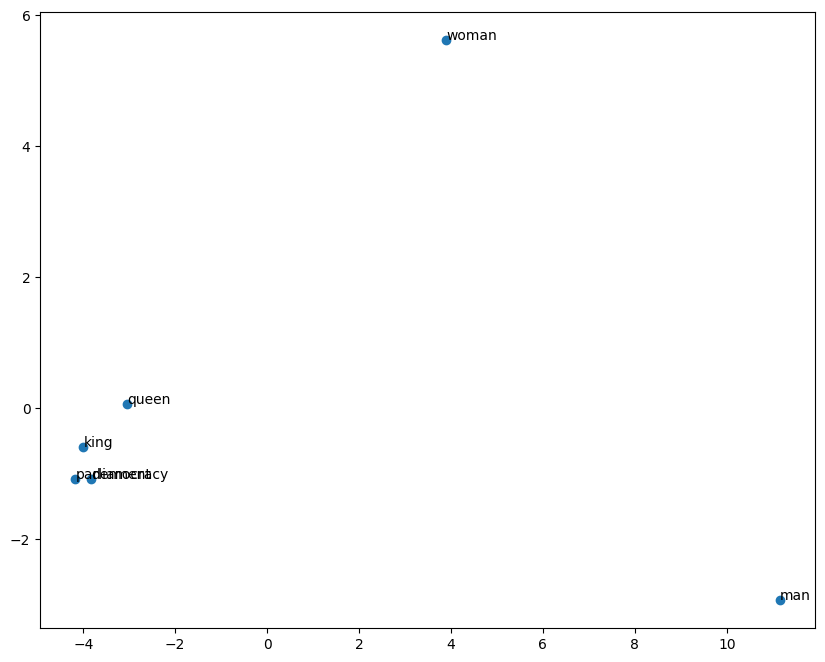


类比推理结果：king - man + woman = uncle


In [17]:
#步骤6：语义关系可视化

# 提取词向量并降维
def plot_vectors(words, model):
    vectors = [model.wv[word] for word in words]
    pca = PCA(n_components=2)
    result = pca.fit_transform(vectors)
    
    plt.figure(figsize=(10,8))
    plt.scatter(result[:,0], result[:,1])
    
    # 添加标注
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i,0], result[i,1]))
    
    plt.show()

# 测试语义关系
test_words = ["king", "queen", "man", "woman", "parliament", "democracy"]
plot_vectors(test_words, model)

# 验证类比关系：king - man + woman ≈ queen
result = model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print("\n类比推理结果：king - man + woman =", result[0][0])

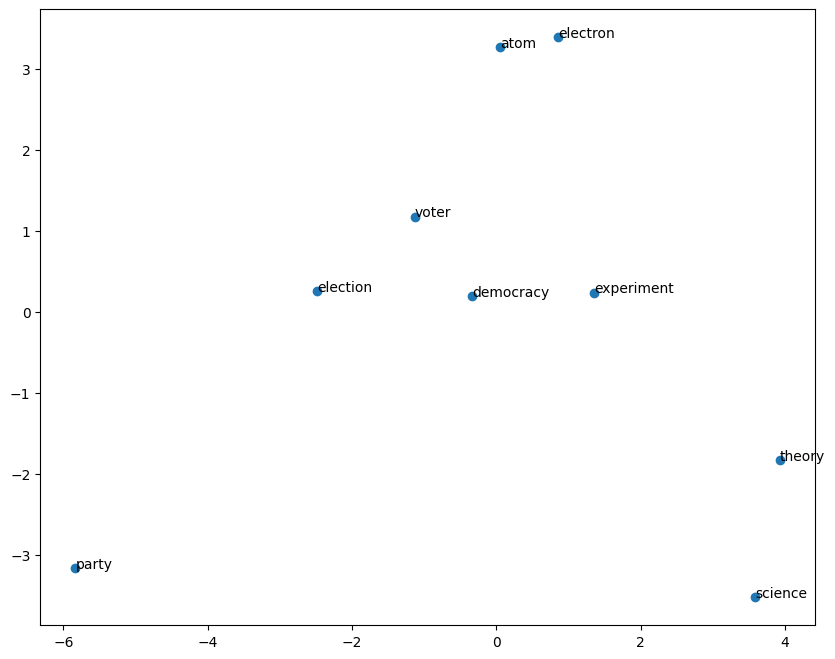


语义相似度计算：
computer vs technology: 0.315
computer vs banana: 0.510


In [18]:
#步骤7：进阶语义分析

# 跨领域语义对比
science_words = ["atom", "electron", "experiment", "theory", "science"]
politics_words = ["election", "voter", "party", "democracy"]

plot_vectors(science_words + politics_words, model)

# 计算词语相似度
print("\n语义相似度计算：")
print(f"computer vs technology: {model.wv.similarity('computer', 'technology'):.3f}")
print(f"computer vs banana: {model.wv.similarity('computer', 'banana'):.3f}")